In [6]:
import mxnet as mx
import matplotlib.pyplot as plt
import cv2
import numpy as np
# define a simple data batch
from collections import namedtuple
import os
Batch = namedtuple('Batch', ['data'])

def get_image(url, show=False):
    # download and show the image
    fname = mx.test_utils.download(url)
    img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
    if img is None:
         return None
    if show:
         plt.imshow(img)
         plt.axis('off')
         plt.show()
    # convert into format (batch, RGB, width, height)
    img = cv2.resize(img, (224, 224))
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2)
    img = img[np.newaxis, :]
    return img

def predict(url):
    img = get_image(url, show=True)
    # compute the predict probabilities
    mod.forward(Batch([mx.nd.array(img)]))
    prob = mod.get_outputs()[0].asnumpy()
    # print the top-5
    prob = np.squeeze(prob)
    a = np.argsort(prob)[::-1]
    for i in a[0:5]:
        print('probability=%f, class=%s' %(prob[i], labels[i]))

In [2]:
#Load Trained Model
sym, arg_params, aux_params = mx.model.load_checkpoint('resnet-152', 0)
mod = mx.mod.Module(symbol=sym, context=mx.cpu(), label_names=None)
mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))], 
         label_shapes=mod._label_shapes)
mod.set_params(arg_params, aux_params, allow_missing=True)
with open('synset_152.txt', 'r') as f:
    labels = [l.rstrip() for l in f]

Test Image 1


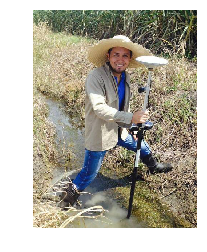

probability=0.466458, class=n09779790 agriculturist, agriculturalist, cultivator, grower, raiser
probability=0.213333, class=n10078806 farmer, husbandman, granger, sodbuster
probability=0.099332, class=n10079399 farmhand, fieldhand, field hand, farm worker
probability=0.034605, class=n03334382 fieldwork
probability=0.020118, class=n07804900 paddy
Test Image 2


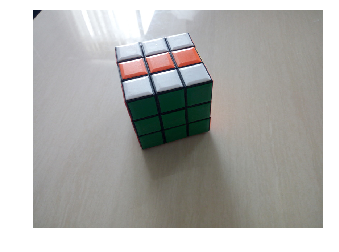

probability=0.494996, class=n13916721 cube, regular hexahedron
probability=0.487712, class=n13914608 block, cube
probability=0.005610, class=n13879049 quadrate
probability=0.005187, class=n04028315 puzzle
probability=0.000540, class=n02883344 box
Test Image 3


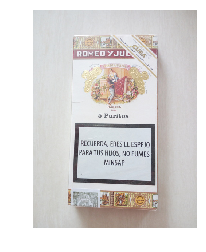

probability=0.580569, class=n03729308 matchbook
probability=0.107170, class=n03871628 packet
probability=0.047371, class=n07565083 menu
probability=0.034801, class=n06263609 print media
probability=0.032240, class=n07248320 book jacket, dust cover, dust jacket, dust wrapper
Test Image 4


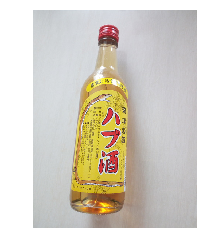

probability=0.112106, class=n07902937 arrack, arak
probability=0.097156, class=n07891433 sake, saki, rice beer
probability=0.076746, class=n07902336 aqua vitae, ardent spirits
probability=0.052077, class=n07884567 alcohol, alcoholic drink, alcoholic beverage, intoxicant, inebriant
probability=0.041212, class=n07907943 liqueur, cordial
Test Image 5


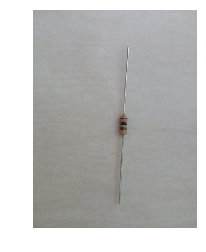

probability=0.275194, class=n03816136 needle
probability=0.181595, class=n03499354 hatpin
probability=0.146983, class=n04079933 resistor, resistance
probability=0.133215, class=n03940256 pin
probability=0.052591, class=n03668067 lightning rod, lightning conductor
Test Image 6


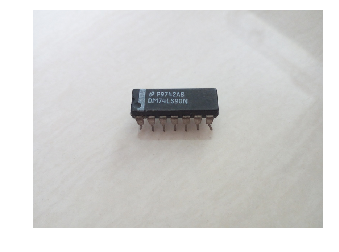

probability=0.342143, class=n03577090 integrated circuit, microcircuit
probability=0.172937, class=n03020034 chip, microchip, micro chip, silicon chip, microprocessor chip
probability=0.163163, class=n04171831 semiconductor device, semiconductor unit, semiconductor
probability=0.160682, class=n03760310 microprocessor
probability=0.052384, class=n04471632 transistor, junction transistor, electronic transistor
Test Image 7


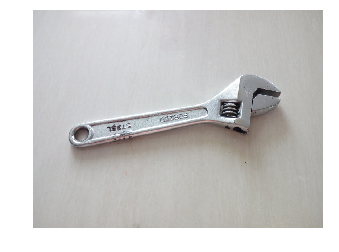

probability=0.657212, class=n02680754 adjustable wrench, adjustable spanner
probability=0.183430, class=n04606574 wrench, spanner
probability=0.098312, class=n03782794 monkey-wrench, monkey wrench
probability=0.027837, class=n03947466 pipe wrench, tube wrench
probability=0.005229, class=n03489162 hand tool
Test Image 8


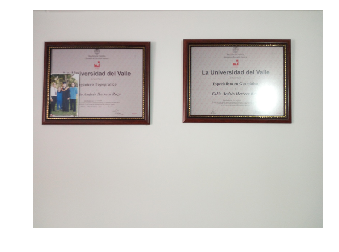

probability=0.564624, class=n03390983 frame, framing
probability=0.282904, class=n03931765 picture frame
probability=0.077349, class=n03412058 gallery, art gallery, picture gallery
probability=0.007515, class=n04182152 shadow box
probability=0.004755, class=n03896526 passe-partout
Test Image 9


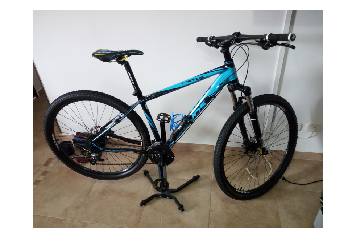

probability=0.293047, class=n03487090 handlebar
probability=0.231853, class=n03792782 mountain bike, all-terrain bike, off-roader
probability=0.143543, class=n02835915 bicycle seat, saddle
probability=0.038151, class=n03659292 lever
probability=0.025584, class=n03616428 kickstand
Test Image 10


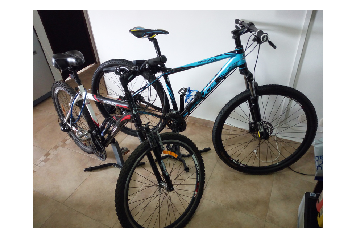

probability=0.186003, class=n03792782 mountain bike, all-terrain bike, off-roader
probability=0.147221, class=n03487090 handlebar
probability=0.096989, class=n04026813 push-bike
probability=0.087664, class=n02835915 bicycle seat, saddle
probability=0.064194, class=n02834778 bicycle, bike, wheel, cycle
Test Image 11


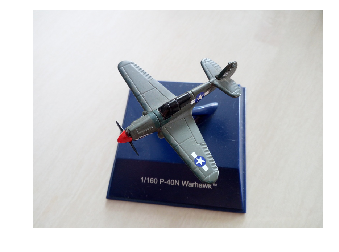

probability=0.070045, class=n03536122 horizontal stabilizer, horizontal stabiliser, tailplane
probability=0.064836, class=n04529962 vertical stabilizer, vertical stabiliser, vertical fin, tail fin, tailfin
probability=0.058788, class=n02689144 airframe
probability=0.052014, class=n03335030 fighter, fighter aircraft, attack aircraft
probability=0.042266, class=n03595860 jet, jet plane, jet-propelled plane
Test Image 12


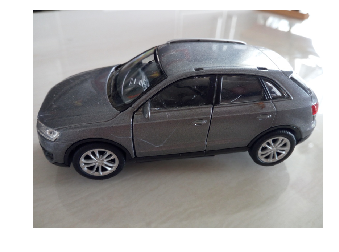

probability=0.349049, class=n04543636 wagon tire
probability=0.070833, class=n02814533 beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon
probability=0.048255, class=n03079136 compact, compact car
probability=0.046539, class=n03770679 minivan
probability=0.042658, class=n03498662 hatchback, hatchback door
Test Image 13


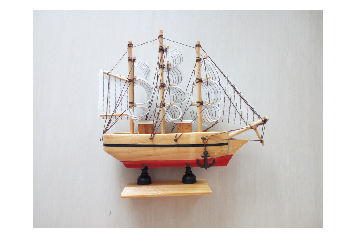

probability=0.127629, class=n03947888 pirate, pirate ship
probability=0.070150, class=n04128837 sailing vessel, sailing ship
probability=0.066507, class=n03775847 mizzenmast, mizenmast, mizzen, mizen
probability=0.041838, class=n02793199 bark, barque
probability=0.029484, class=n04146862 school ship, training ship
Test Image 14


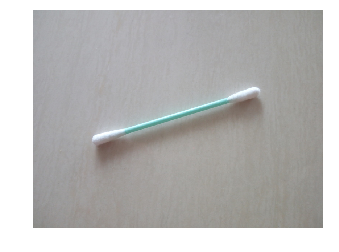

probability=0.913373, class=n04367746 swab
probability=0.015695, class=n03133050 crochet needle, crochet hook
probability=0.008819, class=n03728437 match, lucifer, friction match
probability=0.008672, class=n04453156 toothbrush
probability=0.006098, class=n03729826 matchstick
Test Image 15


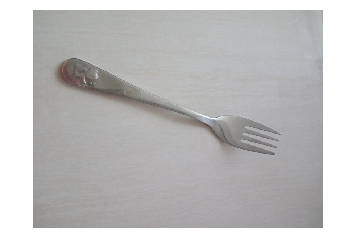

probability=0.201098, class=n04516672 utensil
probability=0.149890, class=n04284438 Spork
probability=0.146692, class=n04380255 tablefork
probability=0.099343, class=n04284002 spoon
probability=0.085100, class=n04439585 tine
Test Image 16


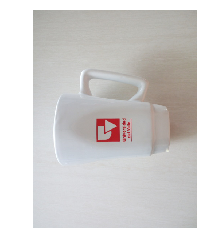

probability=0.146115, class=n03349469 first-aid kit
probability=0.040969, class=n02754103 atomizer, atomiser, spray, sprayer, nebulizer, nebuliser
probability=0.034482, class=n04447443 toiletry, toilet articles
probability=0.029281, class=n03123917 cowbell
probability=0.027481, class=n03603722 jug
Test Image 17


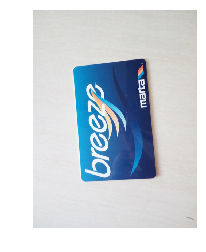

probability=0.199002, class=n04135315 sanitary napkin, sanitary towel, Kotex
probability=0.160695, class=n03359436 flash memory
probability=0.055783, class=n03209910 diskette, floppy, floppy disk
probability=0.030086, class=n03706653 magnetic disk, magnetic disc, disk, disc
probability=0.026397, class=n03642806 laptop, laptop computer
Test Image 18


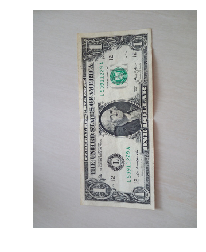

probability=0.236051, class=n10422405 philatelist, stamp collector
probability=0.163632, class=n02871147 bookmark, bookmarker
probability=0.130034, class=n03871628 packet
probability=0.082666, class=n13869788 envelope
probability=0.061099, class=n03291741 envelope
Test Image 19


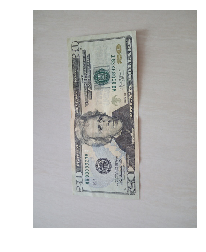

probability=0.409998, class=n02979399 cassette tape
probability=0.138836, class=n03871628 packet
probability=0.083721, class=n03729308 matchbook
probability=0.080649, class=n02978881 cassette
probability=0.032924, class=n02871147 bookmark, bookmarker
Test Image 20


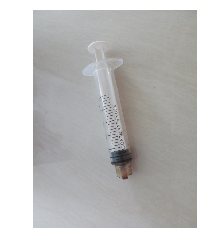

probability=0.767721, class=n04376876 syringe
probability=0.120000, class=n03555662 hypodermic syringe, hypodermic, hypo
probability=0.044057, class=n03555564 hypodermic needle
probability=0.031783, class=n03816136 needle
probability=0.016022, class=n03247083 dropper, eye dropper
Test Image 21


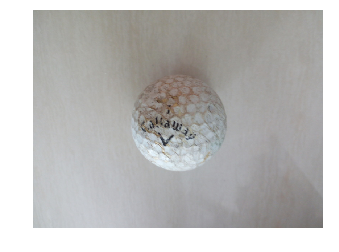

probability=0.895829, class=n03445777 golf ball
probability=0.048244, class=n04399537 tee, golf tee
probability=0.013539, class=n02779435 ball
probability=0.010621, class=n02778669 ball
probability=0.003827, class=n03446832 golf equipment
Test Image 22


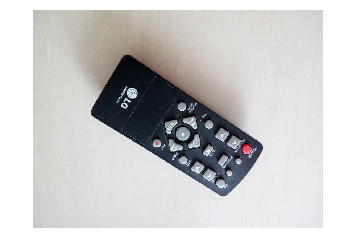

probability=0.987592, class=n04074963 remote control, remote
probability=0.002649, class=n03096960 control, controller
probability=0.001564, class=n03277771 electronic device
probability=0.000709, class=n03314608 faceplate
probability=0.000586, class=n04060647 receiver, receiving system
Test Image 23


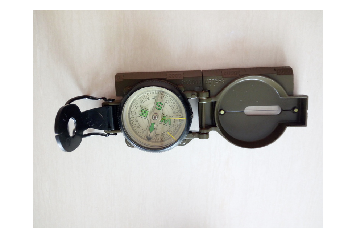

probability=0.324302, class=n03080497 compass
probability=0.069243, class=n03026907 chronograph
probability=0.053875, class=n02794156 barometer
probability=0.051553, class=n03706229 magnetic compass
probability=0.044051, class=n04555897 watch, ticker
Test Image 24


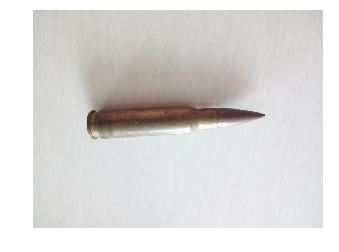

probability=0.441668, class=n02916350 bullet, slug
probability=0.240927, class=n02703275 ammunition, ammo
probability=0.172202, class=n04113641 round, unit of ammunition, one shot
probability=0.108250, class=n02971691 cartridge
probability=0.007940, class=n02973017 cartridge holder, cartridge clip, clip, magazine
Test Image 25


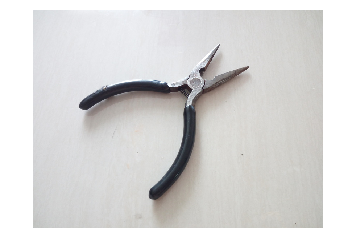

probability=0.671780, class=n03966976 pliers, pair of pliers, plyers
probability=0.118155, class=n04594828 wire cutter
probability=0.103348, class=n03816530 needlenose pliers
probability=0.074963, class=n03308152 extractor
probability=0.006057, class=n04451818 tool
Test Image 26


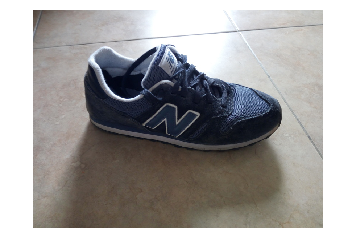

probability=0.842987, class=n04120489 running shoe
probability=0.026600, class=n04199027 shoe
probability=0.018501, class=n13926786 place, shoes
probability=0.014094, class=n04200000 shoe
probability=0.011922, class=n04450994 tongue
Test Image 27


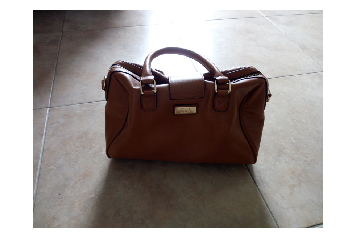

probability=0.295954, class=n02900705 briefcase
probability=0.127911, class=n04518764 valise
probability=0.071595, class=n02773838 bag, traveling bag, travelling bag, grip, suitcase
probability=0.066426, class=n02774630 baggage, luggage
probability=0.057822, class=n02774921 baggage
Test Image 28


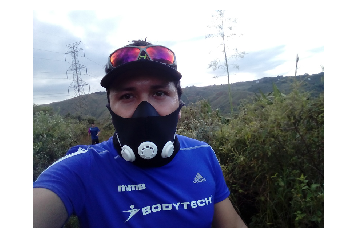

probability=0.299873, class=n04080833 respirator, inhalator
probability=0.288394, class=n03424325 gasmask, respirator, gas helmet
probability=0.107491, class=n03725035 mask
probability=0.041631, class=n04229816 ski mask
probability=0.038384, class=n03724870 mask
Test Image 29


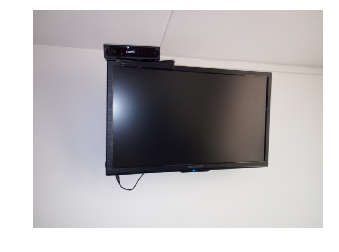

probability=0.277134, class=n06278475 high-definition television, HDTV
probability=0.199153, class=n03676759 liquid crystal display, LCD
probability=0.070807, class=n03781787 monitor
probability=0.060237, class=n03782006 monitor
probability=0.057277, class=n03529860 home theater, home theatre
Test Image 30


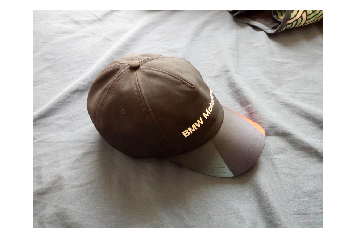

probability=0.351319, class=n02799323 baseball cap, jockey cap, golf cap
probability=0.274249, class=n02954340 cap
probability=0.165968, class=n02955065 cap
probability=0.107503, class=n03610682 kepi, peaked cap, service cap, yachting cap
probability=0.012534, class=n03497657 hat, chapeau, lid
Test Image 31


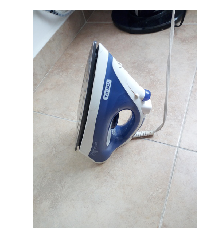

probability=0.503002, class=n03584829 iron, smoothing iron
probability=0.482630, class=n04309833 steam iron
probability=0.008154, class=n04475631 travel iron
probability=0.003263, class=n04517823 vacuum, vacuum cleaner
probability=0.000840, class=n03534776 Hoover
Test Image 32


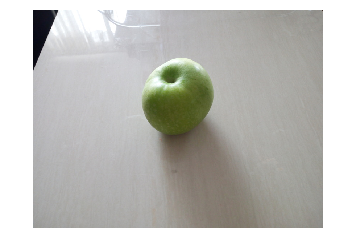

probability=0.339690, class=n07742313 Granny Smith
probability=0.301820, class=n07739125 apple
probability=0.095927, class=n07739506 eating apple, dessert apple
probability=0.062309, class=n07740220 Delicious
probability=0.038040, class=n07740342 Golden Delicious, Yellow Delicious
Test Image 33


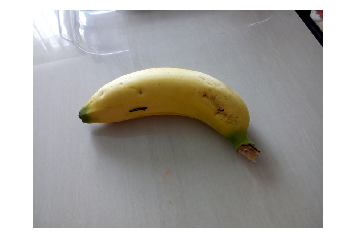

probability=0.747548, class=n07753592 banana
probability=0.113776, class=n07768423 plantain
probability=0.022631, class=n12353203 edible banana, Musa paradisiaca sapientum
probability=0.020969, class=n12352287 banana, banana tree
probability=0.012443, class=n12352990 plantain, plantain tree, Musa paradisiaca
Test Image 34


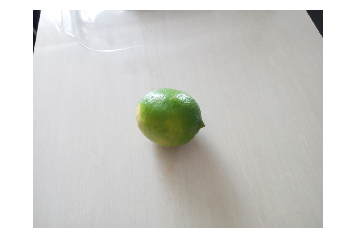

probability=0.537972, class=n07749731 lime
probability=0.188063, class=n07747055 citrus, citrus fruit, citrous fruit
probability=0.090458, class=n12711984 lime, lime tree, Citrus aurantifolia
probability=0.029006, class=n05716342 lemon
probability=0.017392, class=n07749582 lemon
Test Image 35


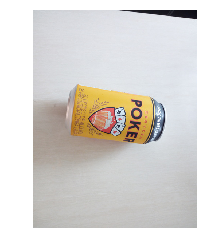

probability=0.262574, class=n07891309 ginger beer
probability=0.093581, class=n02823510 beer can
probability=0.066560, class=n07928488 orange soda
probability=0.056083, class=n02946921 can, tin, tin can
probability=0.055184, class=n07929172 tonic, tonic water, quinine water
Test Image 36


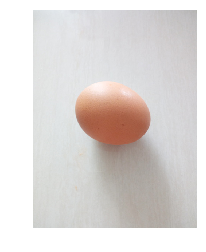

probability=0.773103, class=n07840804 egg, eggs
probability=0.058130, class=n07841495 boiled egg, coddled egg
probability=0.033058, class=n13915023 ovoid
probability=0.026921, class=n07841800 Easter egg
probability=0.023310, class=n07841639 hard-boiled egg, hard-cooked egg
Test Image 37


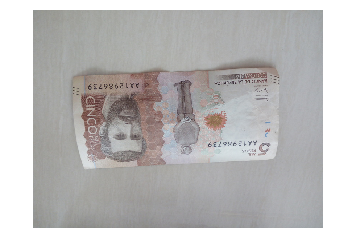

probability=0.147539, class=n03871628 packet
probability=0.130305, class=n03291741 envelope
probability=0.107300, class=n13869788 envelope
probability=0.100449, class=n03291819 envelope
probability=0.085337, class=n03291963 envelope, gasbag
Test Image 38


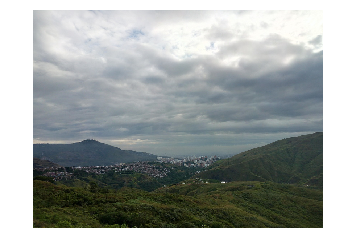

probability=0.103367, class=n09403734 range, mountain range, range of mountains, chain, mountain chain, chain of mountains
probability=0.102867, class=n09283405 foothill
probability=0.063731, class=n09468604 valley, vale
probability=0.058896, class=n13902048 ridge
probability=0.058869, class=n09302616 highland, upland
Test Image 39


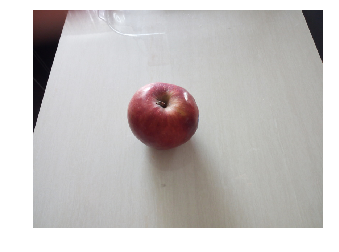

probability=0.527647, class=n07739125 apple
probability=0.122952, class=n07740461 Red Delicious
probability=0.094508, class=n07739506 eating apple, dessert apple
probability=0.078102, class=n07740220 Delicious
probability=0.047244, class=n07740597 Empire
Test Image 40


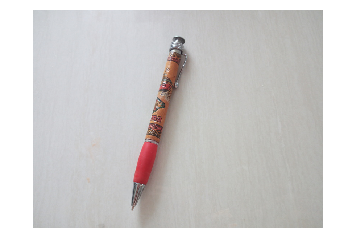

probability=0.423668, class=n02783161 ballpoint, ballpoint pen, ballpen, Biro
probability=0.258045, class=n03906997 pen
probability=0.090817, class=n03652100 lead pencil
probability=0.043899, class=n03388183 fountain pen
probability=0.042084, class=n13863020 pencil
Test Image 41


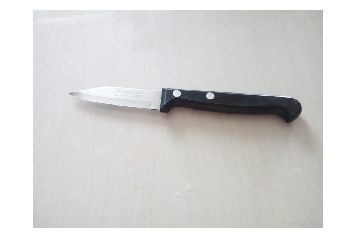

probability=0.328414, class=n03890093 parer, paring knife
probability=0.156264, class=n03623556 knife
probability=0.138188, class=n03624400 knife blade
probability=0.117483, class=n13918387 tongue, knife
probability=0.079943, class=n03624134 knife
Test Image 42


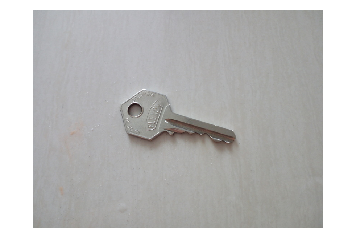

probability=0.575563, class=n03613294 key
probability=0.326565, class=n04586581 winder, key
probability=0.030501, class=n04226826 skeleton key
probability=0.019540, class=n03561047 ignition key
probability=0.009374, class=n03156767 cylinder lock
Test Image 43


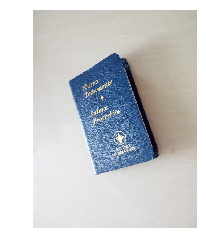

probability=0.163087, class=n03729308 matchbook
probability=0.128225, class=n06415688 jotter
probability=0.095418, class=n03871628 packet
probability=0.089617, class=n03908618 pencil box, pencil case
probability=0.058454, class=n04548362 wallet, billfold, notecase, pocketbook
Test Image 44


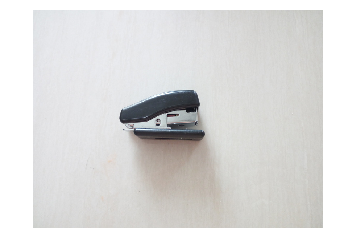

probability=0.998568, class=n04303497 stapler, stapling machine
probability=0.000346, class=n04303357 staple gun, staplegun, tacker
probability=0.000071, class=n04185071 sharpener
probability=0.000056, class=n04095577 riveting machine, riveter, rivetter
probability=0.000045, class=n02951585 can opener, tin opener
Test Image 45


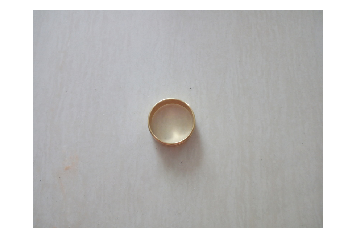

probability=0.161879, class=n02727016 aperture
probability=0.118715, class=n13875392 ring, halo, annulus, doughnut, anchor ring
probability=0.091776, class=n02954938 cap
probability=0.077089, class=n13873917 circle
probability=0.056505, class=n13865483 round shape
Test Image 46


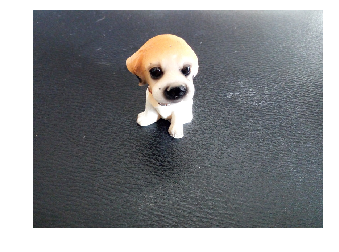

probability=0.125612, class=n02084732 pooch, doggie, doggy, barker, bow-wow
probability=0.104103, class=n02088364 beagle
probability=0.103618, class=n02083346 canine, canid
probability=0.069668, class=n02099712 Labrador retriever
probability=0.056127, class=n01322604 puppy
Test Image 47


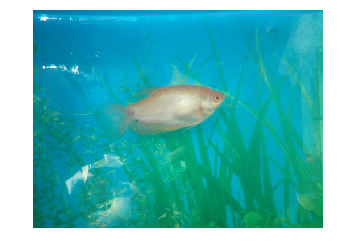

probability=0.256201, class=n02732072 aquarium, fish tank, marine museum
probability=0.091947, class=n02605936 angelfish
probability=0.072055, class=n01449374 mosquitofish, Gambusia affinis
probability=0.063176, class=n02583890 tetra
probability=0.041772, class=n02584449 piranha, pirana, caribe
Test Image 48


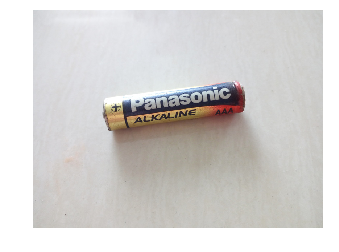

probability=0.451902, class=n02810471 battery, electric battery
probability=0.213425, class=n02810782 battery, stamp battery
probability=0.175598, class=n02666624 A battery
probability=0.069876, class=n03823312 nicad, nickel-cadmium accumulator
probability=0.055623, class=n03287351 energizer, energiser
Test Image 49


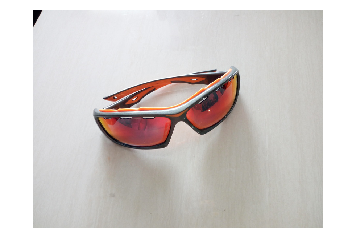

probability=0.386125, class=n04356056 sunglasses, dark glasses, shades
probability=0.245630, class=n04355933 sunglass
probability=0.165676, class=n04272054 spectacles, specs, eyeglasses, glasses
probability=0.134872, class=n03391301 frame
probability=0.042366, class=n02899439 bridge, nosepiece
Test Image 50


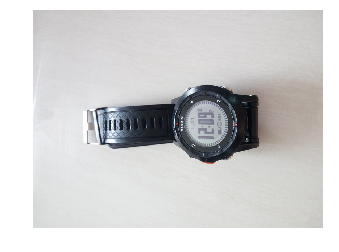

probability=0.314325, class=n03197337 digital watch
probability=0.254046, class=n04607869 wristwatch, wrist watch
probability=0.126361, class=n04555897 watch, ticker
probability=0.102628, class=n02708433 analog watch
probability=0.043936, class=n03142679 crystal, watch crystal, watch glass
Test Image 51


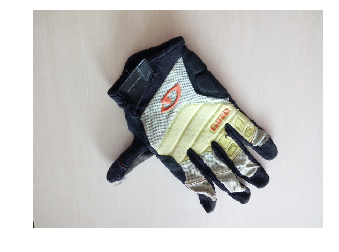

probability=0.461354, class=n03341153 finger
probability=0.160948, class=n03441112 glove
probability=0.133775, class=n02811204 batting glove
probability=0.128589, class=n03616979 kid glove, suede glove
probability=0.049982, class=n03447075 golf glove
Test Image 52


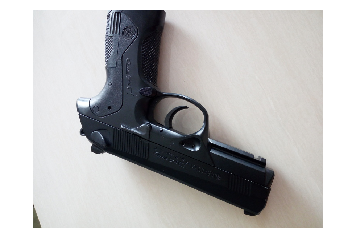

probability=0.105273, class=n03948459 pistol, handgun, side arm, shooting iron
probability=0.103482, class=n03470629 gun trigger, trigger
probability=0.093513, class=n03343853 firearm, piece, small-arm
probability=0.066704, class=n03948830 pistol grip
probability=0.065010, class=n03527444 holster
Test Image 53


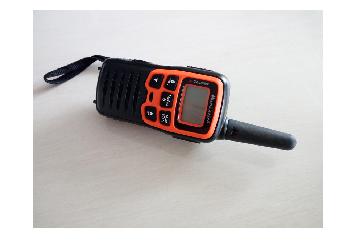

probability=0.346045, class=n04545858 walkie-talkie, walky-talky
probability=0.155448, class=n03578055 intercommunication system, intercom
probability=0.065996, class=n03181293 detector
probability=0.063535, class=n06277135 radio, radiocommunication, wireless
probability=0.062721, class=n03580845 interphone
Test Image 54


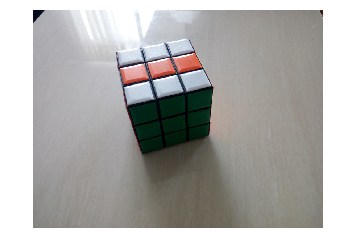

probability=0.538524, class=n13916721 cube, regular hexahedron
probability=0.447844, class=n13914608 block, cube
probability=0.006775, class=n04028315 puzzle
probability=0.003302, class=n13879049 quadrate
probability=0.000263, class=n02883344 box
Test Image 55


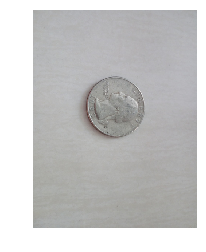

probability=0.746017, class=n04448361 token
probability=0.041483, class=n03954393 planchet, coin blank
probability=0.018597, class=n04554871 washer
probability=0.015397, class=n03565288 imprint
probability=0.014656, class=n02928608 button
Test Image 56


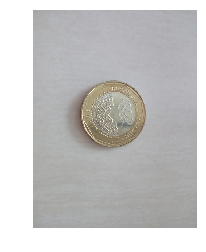

probability=0.841445, class=n04448361 token
probability=0.044325, class=n03954393 planchet, coin blank
probability=0.023342, class=n03445326 gold plate
probability=0.010779, class=n03284743 enamel
probability=0.010339, class=n03284886 enamel
Test Image 57


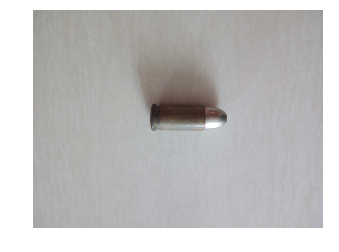

In [ ]:
#Predict form test images
for x in range(1, 61):
    print('#######################################################')
    print("Test Image %d" % (x))
    #print(os.getcwd())
    predict(os.getcwd()+'\\testimages\\test_'+str(x)+'.jpg')
    print('#######################################################')